## **World Development Indicators, Child Mortality**

One of the key aspects to understand **child malnutrition mortality** is to evaluate different **World Development Indicators (WDI)**. The World Bank contains a collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates

In [1]:
#!pip install world_bank_data
import world_bank_data as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,5)

# adjust column width to see the entire text in the dataframes below
pd.options.display.max_colwidth = 600

To explore the WDI published by the World Bank we use world_bank_data library, which is an implementation of the World Bank API v2 in Python.

In [2]:
#List of available topics
wb.get_topics().head(10)

,value,sourceNote
id,,
1,Agriculture & Rural Development,"For the 70 percent of the world's poor who live in rural areas, agriculture is the main source of income and employment. But depletion and degradation of land and water pose serious challenges to producing enough food and other agricultural products to sustain livelihoods here and meet the needs of urban populations. Data presented here include measures of agricultural inputs, outputs, and productivity compiled by the UN's Food and Agriculture Organization."
2,Aid Effectiveness,"Aid effectiveness is the impact that aid has in reducing poverty and inequality, increasing growth, building capacity, and accelerating achievement of the Millennium Development Goals set by the international community. Indicators here cover aid received as well as progress in reducing poverty and improving education, health, and other measures of human welfare."
3,Economy & Growth,"Economic growth is central to economic development. When national income grows, real people benefit. While there is no known formula for stimulating economic growth, data can help policy-makers better understand their countries' economic situations and guide any work toward improvement. Data here covers measures of economic growth, such as gross domestic product (GDP) and gross national income (GNI). It also includes indicators representing factors known to be relevant to economic growth, such as capital stock, employment, investment, savings, consumption, government spending, imports, and..."
4,Education,"Education is one of the most powerful instruments for reducing poverty and inequality and lays a foundation for sustained economic growth. The World Bank compiles data on education inputs, participation, efficiency, and outcomes. Data on education are compiled by the United Nations Educational, Scientific, and Cultural Organization (UNESCO) Institute for Statistics from official responses to surveys and from reports provided by education authorities in each country."
5,Energy & Mining,"The world economy needs ever-increasing amounts of energy to sustain economic growth, raise living standards, and reduce poverty. But today's trends in energy use are not sustainable. As the world's population grows and economies become more industrialized, nonrenewable energy sources will become scarcer and more costly. Data here on energy production, use, dependency, and efficiency are compiled by the World Bank from the International Energy Agency and the Carbon Dioxide Information Analysis Center."
6,Environment,"Natural and man-made environmental resources – fresh water, clean air, forests, grasslands, marine resources, and agro-ecosystems – provide sustenance and a foundation for social and economic development. The need to safeguard these resources crosses all borders. Today, the World Bank is one of the key promoters and financiers of environmental upgrading in the developing world. Data here cover forests, biodiversity, emissions, and pollution. Other indicators relevant to the environment are found under data pages for Agriculture & Rural Development, Energy & Mining, Infrastructure, and Ur..."
7,Financial Sector,"An economy's financial markets are critical to its overall development. Banking systems and stock markets enhance growth, the main factor in poverty reduction. Strong financial systems provide reliable and accessible information that lowers transaction costs, which in turn bolsters resource allocation and economic growth. Indicators here include the size and liquidity of stock markets; the accessibility, stability, and efficiency of financial systems; and international migration and workers\ remittances, which affect growth and social welfare in both sending and receiving countries."
8,Health,"Improving health is central to the Millennium Development Goals, and the public sector is the main provider of health care in developing countries. To reduce inequities, many countries have emphasized primary health care, in

In [0]:
#List of available sources
wb.get_sources().head()

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
1,2019-10-23,Doing Business,DBS,,,Y,Y,3
2,2020-04-09,World Development Indicators,WDI,,,Y,Y,3
3,2019-11-07,Worldwide Governance Indicators,WGI,,,Y,Y,3
5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
6,2019-12-02,International Debt Statistics,IDS,,,Y,Y,3


In [0]:
#list of countries
wb.get_countries().head()

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170


Now that we understand a bit more the data about the different topics, sources and countries we will start to search for some WDI that can be related to malnutrition.

In [0]:
#search all indicators related to 'nutrition'
nutrition_ind=wb.search_indicators('nutrition').reset_index()
nutrition_ind

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,5.51.01.02.malnut,Child malnutrition,,Statistical Capacity Indicators,"Prevalence of underweight children under-five years of age, also known as prevalence of child malnutrition (weight for age), is the percentage of children under-five whose weight for age is less than minus two standard deviations from the median for the international reference population ages 0 to 59 months. The data are based on the World Health Organization’s new child growth standards released in 2006. Child malnutrition is linked to poverty, low levels of education, and poor access to health services. Sufficient and good-quality nutrition is therefore critical for development, health, ...","World Development Indicator (WDI) databank. Original source: World Health Organization (WHO), Global Database on Child Growth and Malnutrition",
1,5.51.01.03.mortal,Child mortality,,Statistical Capacity Indicators,"Under-five mortality rate is the probability that a newborn baby will die before reaching age five, if subject to current age-specific mortality rates. The probability is expressed as a rate per 1,000. The indicator measures child survival. Survival of a child is closely linked to the provision of primary health-care services; but poverty, malnutrition, a decline in breast-feeding, maternal education, use of improved water, and inadequacy sanitation and health facilities are all associated with high child mortality. The indicator relates to the fourth MDG calling for reducing child mortality.","World Development Indicator (WDI) databank. Original source: UNICEF, WHO, World Bank, UN DESA, UNPD",
2,DC.ODA.SOCL.CD,"Bilateral, sector-allocable ODA to basic social services (current US$)",,Millennium Development Goals,"Bilateral official development assistance (ODA) commitments are firm obligations, expressed in writing and backed by the necessary funds, undertaken by official bilateral donors to provide specified assistance to a recipient country or a multilateral organization. Bilateral commitments are recorded in the full amount of expected transfer, irrespective of the time required for completing disbursements. Total sector-allocable aid is the sum of aid that can be assigned to specific sectors or multisector activities. Basic social services consists of, primary education, basic life skills for yo...","Development Assistance Committee of the Organisation for Economic Co-operation and Development, Geographical Distribution of Financial Flows to Developing Countries, Development Co-operation Report, and International Development Statistics database. Data are available online at: www.oecd.org/dac/stats/idsonline.",Millenium development goals
3,DC.ODA.SOCL.ZS,"Bilateral, sector-allocable ODA to basic social services (% of bilateral ODA commitments)",,Millennium Development Goals,"Bilateral official development assistance (ODA) commitments are firm obligations, expressed in writing and backed by the necessary funds, undertaken by official bilateral donors to provide specified assistance to a recipient country or a multilateral organization. Bilateral commitments are recorded in the full amount of expected transfer, irrespective of the time required for completing disbursements. Total sector-allocable aid is the sum of aid that can be assigned to specific sectors or multisector activities. Basic social services consists of, primary education, basic life skills for yo...","Development Assistance Committee of the Organisation for Economic Co-operation and Development, Geographical Distribution of Financial Flows to Developing Countries, Development Co-operation Report, and International Development Statistics database. Data are available online at: www.oecd.org/dac/stats/idsonline.",Millenium development goals
4,DT.ODA.DACD.HLTH.BAS.CD,"Gross ODA aid disbursement for basic health, DAC donors total (current US$)",,Africa Development Indicators,This is described as basic health care; basic health infrastru

How does the World Bank code its indicators? <br>
- Topic (2 digits)
- General Subject (3 digits)
- Specific Subject (4 digits)
- Extensions (2 digits each)

For example: DT.DIS.PRVT.CD would read "External debt disbursements by private creditors in current US dollars."

In [0]:
#check number of indicators related to nutrition
nutrition_ind.shape

(573, 7)

In [0]:
#searching for child mortality indicators
child_mort_ind=wb.search_indicators('child mortality')

#reseting index to allow 'id' to be a column in the dataframe
child_mort_ind.reset_index(inplace=True)
child_mort_ind

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,5.51.01.03.mortal,Child mortality,,Statistical Capacity Indicators,"Under-five mortality rate is the probability that a newborn baby will die before reaching age five, if subject to current age-specific mortality rates. The probability is expressed as a rate per 1,000. The indicator measures child survival. Survival of a child is closely linked to the provision of primary health-care services; but poverty, malnutrition, a decline in breast-feeding, maternal education, use of improved water, and inadequacy sanitation and health facilities are all associated with high child mortality. The indicator relates to the fourth MDG calling for reducing child mortality.","World Development Indicator (WDI) databank. Original source: UNICEF, WHO, World Bank, UN DESA, UNPD",
1,5.51.01.04.immun,Immunization,,Statistical Capacity Indicators,"The proportion of one-year-old children immunized against measles is the proportion of children aged one who received one dose of measles vaccine. A child is considered adequately immunized against measles after receiving one dose of vaccine. Immunization is an essential component for reducing under-five mortality, and it serves as a proxy to measure the coverage and the quality of the child health care system. This indicator is also related to the fourth MDG aiming at reducing child mortality.",World Development Indicator (WDI) databank. Original source: WHO and UNICEF,
2,HD.HCI.MORT,Probability of Survival to Age 5,,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
3,HD.HCI.MORT.FE,"Probability of Survival to Age 5, Female",,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
4,HD.HCI.MORT.MA,"Probability of Survival to Age 5, Male",,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
5,MO.INDEX.HDEV.XQ,Human Development,,Africa Development Indicators,"Health and Welfare: Within this sub-category the Ibrahim Index measures: (i) Incidence of TB – incidence of new cases of Tuberculosis. (ii) Child Mortality – likelihood that a newborn baby will die before the age of five, assuming that he/she is subject to current, age-specific mortality rates. (iii) Immunisation against Measles – proportion of one year olds (children aged 12–23 months) who have received one dose of measles vaccine. (iv) Immunisation against DTP – proportion of one year olds (children aged 12–23 months) who have received three doses of DTP vaccine. (v) Welfare Regime – equ...","Mo Ibrahim Foundation, electronic files and web site.",
6,SH.DTH.0514,Number of deaths ages 5-14 years,,World Development Indicators,Number of deaths of children ages 5-14 years,"Estimates developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.",Health
7,SH.DTH.IMRT,Number of infant deaths,,World Development Indicators,Number of infants dying before reaching one year of age.,"Estimates developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.",Health
8,SH.DTH.MORT,Number of under-five deaths,,Worl

In [19]:
#searching for child mortality indicators
child_mort_ind=wb.search_indicators('under-5')

#reseting index to allow 'id' to be a column in the dataframe
child_mort_ind.reset_index(inplace=True)
child_mort_ind

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,HD.HCI.MORT,Probability of Survival to Age 5,,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
1,HD.HCI.MORT.FE,"Probability of Survival to Age 5, Female",,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
2,HD.HCI.MORT.MA,"Probability of Survival to Age 5, Male",,Human Capital Index,Probability of Survival to Age 5 is calculated by subtracting the under-5 mortality rate from 1. Most recent estimates are used. Year of most recent estimate shown in data notes.,"United Nations Inter-agency Group for Child Mortality Estimation (UN IGME), supplemented with data provided by World Bank staff.",
3,HF.DYN.MORT,"Mortality rate, under-5 (per 1,000)",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
4,HF.DYN.MORT.Q1,"Mortality rate, under-5 (per 1,000): Q1 (lowest)",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
5,HF.DYN.MORT.Q2,"Mortality rate, under-5 (per 1,000): Q2",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
6,HF.DYN.MORT.Q3,"Mortality rate, under-5 (per 1,000): Q3",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
7,HF.DYN.MORT.Q4,"Mortality rate, under-5 (per 1,000): Q4",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
8,HF.DYN.MORT.Q5,"Mortality rate, under-5 (per 1,000): Q5 (highest)",,Health Equity and Financial Protection Indicators,"Deaths of children before their 5th birthday per 1,000 live births. Sample: children born up to 5 years before the survey for full population mortality estimates, and up to 10 years before the survey for wealth quintile specific mortality estimates","Health Equity and Financial Protection Indicators (HEFPI) database, World Bank",
9,HF.MLR.NETS.ZS,Use of insecticide-treated bed nets (% of under-5 population),,Health Equity and Financial Pro

In [0]:
#some summary stats to see the topic and source related to the child mortality indicators
child_mort_ind.groupby(['source','topics']).size()

source                           topics                                   
Africa Development Indicators                                                  1
                                 Gender,Health                                 1
                                 Health ,Gender                                1
Human Capital Index                                                            3
Statistical Capacity Indicators                                                2
World Development Indicators     Health                                       11
                                 Health ,Aid Effectiveness ,Climate Change     1
dtype: int64

In [0]:
#first we focus in under-5 child mortality rate
child_mort_ind[child_mort_ind.id == 'SH.DYN.MORT']

,id,name,unit,source,sourceNote,sourceOrganization,topics
13,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",,World Development Indicators,"Under-five mortality rate is the probability per 1,000 that a newborn baby will die before reaching age five, if subject to age-specific mortality rates of the specified year.","Estimates Developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.","Health ,Aid Effectiveness ,Climate Change"


As it says in the sourceOrganization column that estimate is deloped by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.
To get the specific values corresponding to that WDI, we use the get_series method.

In [0]:
#get the indicator for year 2018.
#SH.DYN.MORT => Mortality rate, under-5 (per 1,000 live births)	
under5=wb.get_series('SH.DYN.MORT', simplify_index=True).to_frame().reset_index()
under5

,Country,Year,SH.DYN.MORT
0,Arab World,1960,NaN
1,Arab World,1961,NaN
2,Arab World,1962,NaN
3,Arab World,1963,NaN
4,Arab World,1964,NaN
...,...,...,...
15835,Zimbabwe,2015,54.3
15836,Zimbabwe,2016,50.4
15837,Zimbabwe,2017,49.3
15838,Zimbabwe,2018,46.2


In [0]:
#group by year and sum
under5_group=under5.groupby(['Year'])['SH.DYN.MORT'].agg('mean').to_frame().reset_index()
under5_group

,Year,SH.DYN.MORT
0,1960,154.759794
1,1961,153.673737
2,1962,153.268317
3,1963,151.915596
4,1964,151.110435
5,1965,146.360684
6,1966,145.384874
7,1967,141.796748
8,1968,137.155118
9,1969,134.669403


In [5]:
# Mortality rate, under-5, male (per 1,000 live births)
child_mort_ind[child_mort_ind.id == 'SH.DYN.MORT.MA']

,id,name,unit,source,sourceNote,sourceOrganization,topics
344,SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live births)",,World Development Indicators,"Under-five mortality rate, male is the probability per 1,000 that a newborn male baby will die before reaching age five, if subject to male age-specific mortality rates of the specified year.","Estimates Developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.",Health


In [6]:
#get the indicator for year 2018.
#SH.DYN.MORT => Mortality rate, under-5 male(per 1,000 live births)	
under5=wb.get_series('SH.DYN.MORT.MA', simplify_index=True).to_frame().reset_index()
under5

,Country,Year,SH.DYN.MORT.MA
0,Arab World,1960,NaN
1,Arab World,1961,NaN
2,Arab World,1962,NaN
3,Arab World,1963,NaN
4,Arab World,1964,NaN
...,...,...,...
15835,Zimbabwe,2015,59.2
15836,Zimbabwe,2016,NaN
15837,Zimbabwe,2017,NaN
15838,Zimbabwe,2018,50.6


In [7]:
#group by year and sum
under5_group=under5.groupby(['Year'])['SH.DYN.MORT.MA'].agg('mean').to_frame().reset_index()
under5_group

,Year,SH.DYN.MORT.MA
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


In [11]:
#####how to extract the two of them
#get indicator
oda_usd_df=wb.get_series('SH.DYN.MORT.MA').to_frame().reset_index()

#group by year and sum
oda_usd_df_group=oda_usd_df.groupby(['Year'])['SH.DYN.MORT.MA'].agg('mean').to_frame().reset_index()
oda_usd_df_group.tail()

,Year,SH.DYN.MORT.MA
55,2015,34.869908
56,2016,NaN
57,2017,NaN
58,2018,31.648405
59,2019,NaN


In [8]:
# Mortality rate, under-5, male (per 1,000 live births)
child_mort_ind[child_mort_ind.id == 'SH.DYN.MORT.FE']

,id,name,unit,source,sourceNote,sourceOrganization,topics
343,SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 live births)",,World Development Indicators,"Under-five mortality rate, female is the probability per 1,000 that a newborn female baby will die before reaching age five, if subject to female age-specific mortality rates of the specified year.","Estimates Developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.",Health


In [9]:
#get the indicator for year 2018.
#SH.DYN.MORT => Mortality rate, under-5 female(per 1,000 live births)	
under5=wb.get_series('SH.DYN.MORT.FE', simplify_index=True).to_frame().reset_index()
under5

,Country,Year,SH.DYN.MORT.FE
0,Arab World,1960,NaN
1,Arab World,1961,NaN
2,Arab World,1962,NaN
3,Arab World,1963,NaN
4,Arab World,1964,NaN
...,...,...,...
15835,Zimbabwe,2015,49.2
15836,Zimbabwe,2016,NaN
15837,Zimbabwe,2017,NaN
15838,Zimbabwe,2018,41.7


In [10]:
#group by year and sum
under5_group=under5.groupby(['Year'])['SH.DYN.MORT.FE'].agg('mean').to_frame().reset_index()
under5_group

,Year,SH.DYN.MORT.FE
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


In [21]:
# ARI treatment (% of children under 5 taken to a health provider)
child_mort_ind[child_mort_ind.id == 'SH.STA.ARIC.ZS']

,id,name,unit,source,sourceNote,sourceOrganization,topics


In [15]:
# Prevalence of underweight, weight for age (% of children under 5)
child_mort_ind[child_mort_ind.id == 'SH.STA.MALN.ZS']

,id,name,unit,source,sourceNote,sourceOrganization,topics


In [17]:
# Prevalence of anemia among children (% of children under 5)
child_mort_ind[child_mort_ind.id == 'SH.ANM.CHLD.ZS']

,id,name,unit,source,sourceNote,sourceOrganization,topics


In [0]:
#second we focus in Bilateral official development assistance (ODA) 
nutrition_ind[nutrition_ind.id == 'DC.ODA.SOCL.CD']

,id,name,unit,source,sourceNote,sourceOrganization,topics
2,DC.ODA.SOCL.CD,"Bilateral, sector-allocable ODA to basic social services (current US$)",,Millennium Development Goals,"Bilateral official development assistance (ODA) commitments are firm obligations, expressed in writing and backed by the necessary funds, undertaken by official bilateral donors to provide specified assistance to a recipient country or a multilateral organization. Bilateral commitments are recorded in the full amount of expected transfer, irrespective of the time required for completing disbursements. Total sector-allocable aid is the sum of aid that can be assigned to specific sectors or multisector activities. Basic social services consists of, primary education, basic life skills for yo...","Development Assistance Committee of the Organisation for Economic Co-operation and Development, Geographical Distribution of Financial Flows to Developing Countries, Development Co-operation Report, and International Development Statistics database. Data are available online at: www.oecd.org/dac/stats/idsonline.",Millenium development goals


In [0]:
#get indicator
oda_usd_df=wb.get_series('DC.ODA.SOCL.CD').to_frame().reset_index()

#group by year and sum
oda_usd_df_group=oda_usd_df.groupby(['Year'])['DC.ODA.SOCL.CD'].agg('mean').to_frame().reset_index()
oda_usd_df_group.tail()

,Year,DC.ODA.SOCL.CD
21,2011,5.276582e+08
22,2012,5.405051e+08
23,2013,4.908926e+08
24,2014,5.426073e+08
25,2015,5.020514e+08


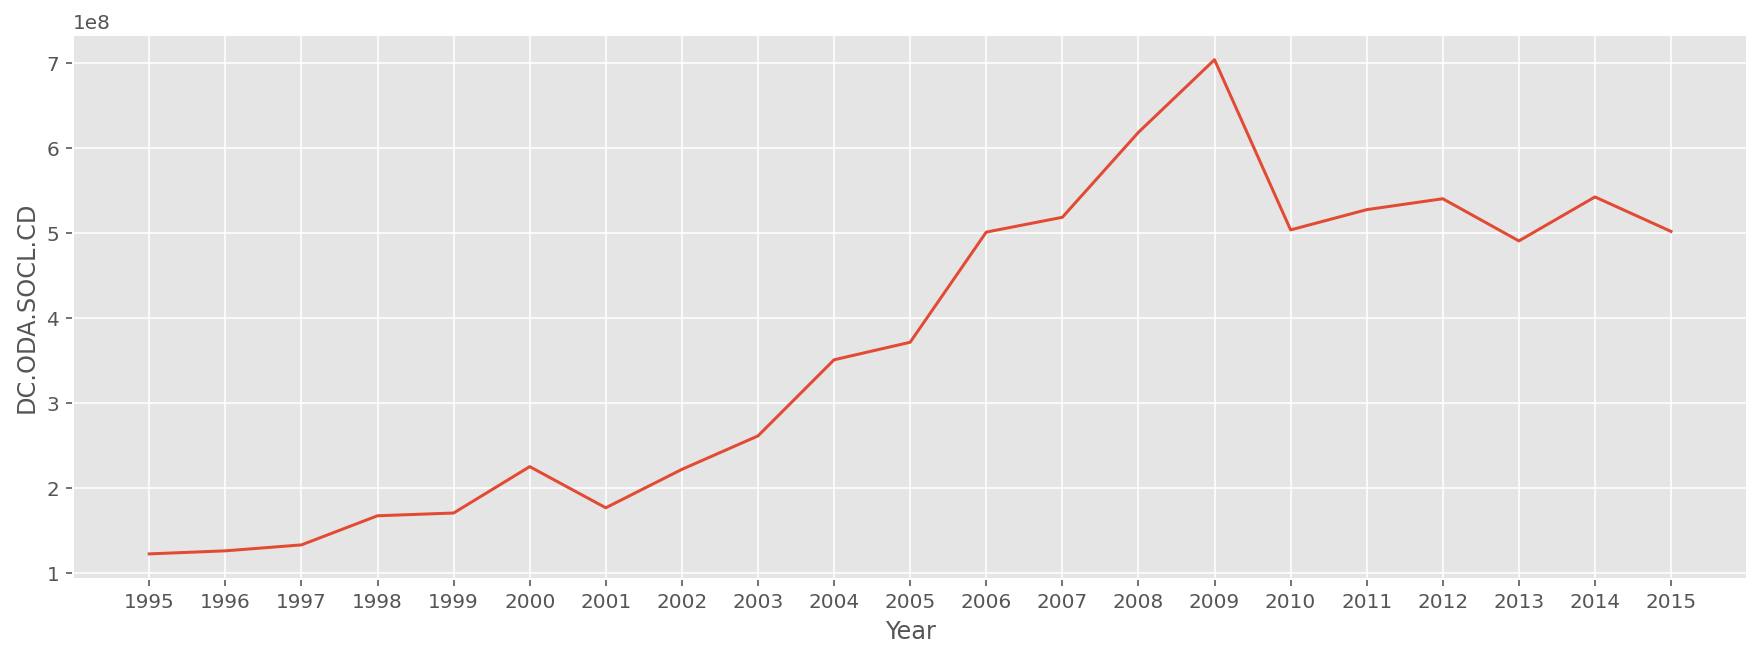

In [0]:
#evolution of ODA 
sns.lineplot(x="Year", y="DC.ODA.SOCL.CD", data=oda_usd_df_group)

Beginning in 1995 until 2009, this international funding was increasing each year, but have had a decrease in 2010.
https://www.msf.org/sites/msf.org/files/2018-08/malnutrition-how-much-money-is-being-spent.pdf

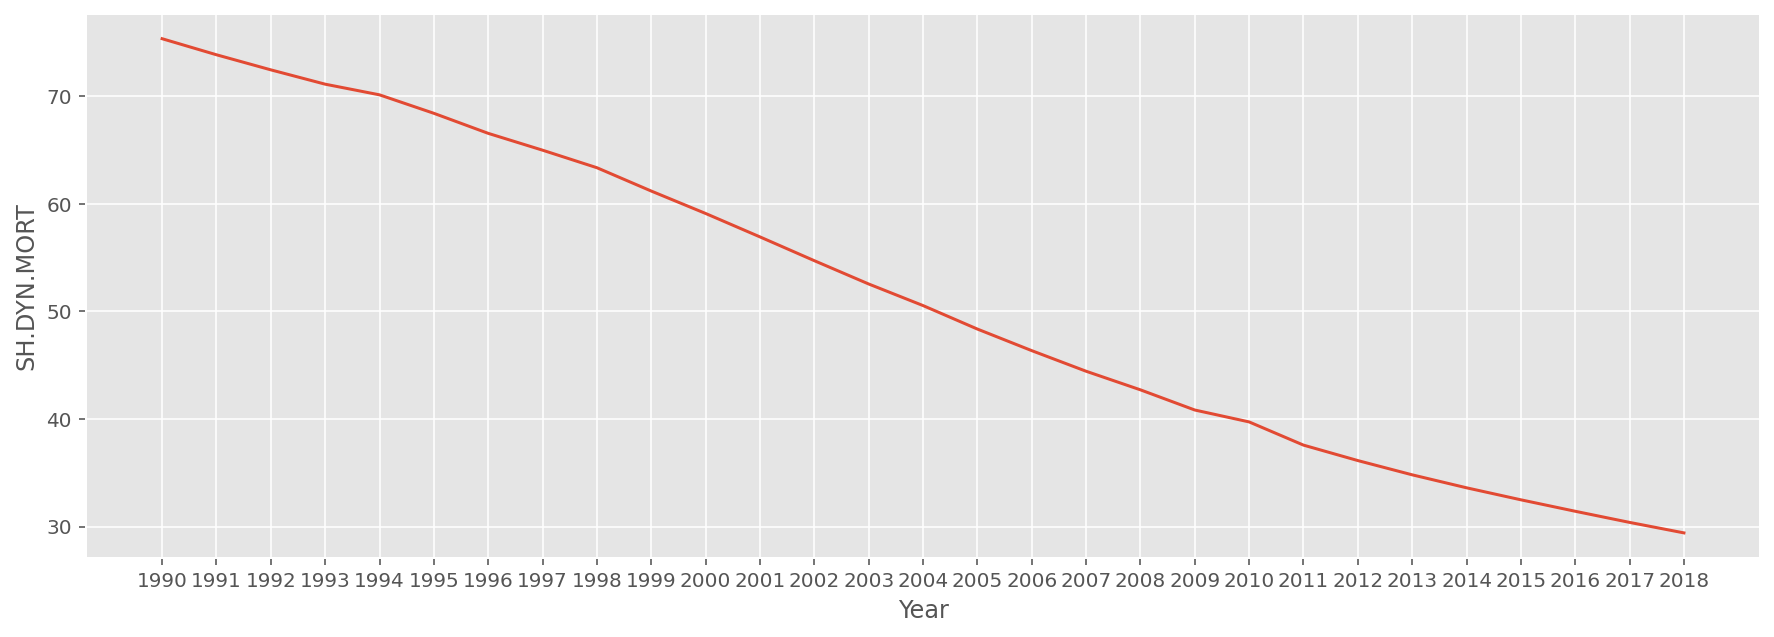

In [0]:
#plot child mortality rate 
sns.lineplot(x="Year", y="SH.DYN.MORT", data=under5_group.loc[under5_group['Year'] >= '1990', ['Year','SH.DYN.MORT']])